## **In this homework, you can only use numpy! No Pytorch, no mxnet, no "autograd" of any kind. You must compute gradients yourself and implement all optimizers yourself from scratch.**

# Problem 1

Consider the following function:
$$f(x, y) = x^2 + 10y^2$$
A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

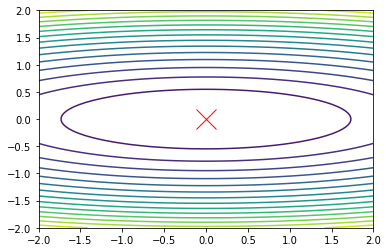

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

1. Show (via derivation through calculus, not through coding) that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newton-s-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

In [ ]:
# Functions to calculate the function values and the Gradient

def f1(x, y):
    return x**2 + 10 * (y**2)
def df1dx(x,y):
    return 2*x
def df1dy(x,y):
    return 20*y
def grad1(x, y):
    return np.array([df1dx(x), df1dy(y)])

In [ ]:
# Minimizing function using Gradient Descent - Problem 1.1
def grad_descent(dfdx,dfdy,max_iter,init_t, lr, epsilon):
    t = init_t.copy()
    ret = np.zeros([2,2])

    iter = 0
    while iter < max_iter:
        t[0] = t[0] - lr * dfdx(t[0],t[1])
        t[1] = t[1] - lr * dfdy(t[0],t[1])
        if abs(ret[-1][0] - t[0]) < epsilon and abs(ret[-1][1] - t[1]) < epsilon:
            print(f"Gradient Descent converges at {iter} step for Learning Rate {lr}")
            break
        ret = np.vstack((ret,[t]))

        iter += 1

    return ret



Problem 1.2

I had trouble attaching my work to this file, so I have attached a picture of my work to the Sakai submission.

Gradient Descent converges at 19 step for Learning Rate 0.085
Gradient Descent converges at 19 step for Learning Rate 0.08600000000000001
Gradient Descent converges at 19 step for Learning Rate 0.08700000000000001
Gradient Descent converges at 19 step for Learning Rate 0.08800000000000001
GD 20 steps Good Learning rate:0.089, Function Value:0.0020565576751767193
GD 20 steps Bad Divergent Learning rate:0.10300000000000001, Function Value:102.85757281268835


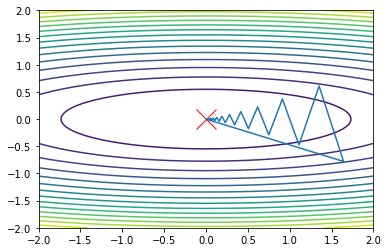

In [ ]:
# Trying many learning rates
epsilon = 0.01
convergence_dict = {}
learning_rate = np.linspace(0.001,1,1000)
for lr in learning_rate:
    ret = grad_descent(df1dx, df1dy, max_iter=20, init_t=np.array([2.0,1.0]), lr=lr,epsilon=epsilon) #best convergence at 0.08 LR
    function_value = f1(ret[-1,0],ret[-1,1])
    convergence_dict[lr] = function_value


good_convergence = {k: v for k, v in convergence_dict.items() if v < epsilon}
minval = min(good_convergence.values())
res = [(k,v) for k, v in good_convergence.items() if v == minval]
print(f'GD 20 steps Good Learning rate:{res[0][0]}, Function Value:{res[0][1]}')

divergence = {k: v for k, v in convergence_dict.items() if v > 100}
print(f'GD 20 steps Bad Divergent Learning rate:{list(divergence.keys())[0]}, Function Value:{list(divergence.values())[0]}') 

# plot contour for best learning rate
ret = grad_descent(df1dx, df1dy,max_iter=20, init_t=np.array([2.0,1.0]), lr=res[0][0],epsilon=epsilon)
plot_contour()
plt.plot(ret[:,0],ret[:,1], '-')



In [ ]:
#Minimizing function using Momentum - Problem 1.3
def grad_descent_momentum(dfdx,dfdy,max_iter,init_t, lr, eta, epsilon):
    t = init_t.copy()
    ret = np.array([init_t.copy()])
    v1 = 0.0
    v2 = 0.0
    iter = 0
    while iter < max_iter:
        v1 = eta * v1 + dfdx(t[0],t[1])
        v2 = eta * v2 + dfdy(t[0],t[1])
        t[0] = t[0] - lr * v1
        t[1] = t[1] - lr * v2
        if abs(ret[-1][0] - t[0]) < epsilon and abs(ret[-1][1] - t[1]) < epsilon:
            print(f"Momentum converges at {iter} step for Learning Rate {lr}")
            break
        ret = np.vstack((ret,[t]))
        iter += 1

    return ret

In [ ]:
# Momentum in 20 steps
convergence_dict.clear()
good_convergence.clear()
for lr in learning_rate:
    ret = grad_descent_momentum(df1dx, df1dy,max_iter=20, init_t=np.array([2.0,1.0]), lr=lr, eta=0.9,epsilon=epsilon)
    function_value = f1(ret[-1, 0], ret[-1, 1])
    convergence_dict[lr] = function_value

good_convergence = {k: v for k, v in convergence_dict.items() if v < epsilon}
if len(good_convergence) == 0:
    print(f'Momentum 20 steps did not converge at any learning rate')
else:
    minval = min(good_convergence.values())
    res = [(k,v) for k, v in good_convergence.items() if v == minval]
    print(f'Momentum 20 steps Good Learning rate:{res[0][0]}, Function Value:{res[0][1]}')

Momentum converges at 13 step for Learning Rate 0.095
Momentum 20 steps Good Learning rate:0.07, Function Value:0.00958735617701066


In [ ]:
# Momentum in 100 steps
convergence_dict.clear()
good_convergence.clear()
for lr in learning_rate:
    ret = grad_descent_momentum(df1dx, df1dy,max_iter=100, init_t=np.array([2.0,1.0]), lr=lr, eta=0.9,epsilon=epsilon)
    function_value = f1(ret[-1, 0], ret[-1, 1])
    convergence_dict[lr] = function_value

good_convergence = {k: v for k, v in convergence_dict.items() if v < epsilon}
minlr = min(good_convergence.keys())
maxlr = max(good_convergence.keys())
print(f'Momentum 100 steps - Largest Learning rate with very good convergence:{maxlr}')
print(f'Momentum 100 steps - Smallest Learning rate with very good convergence:{minlr}')

Momentum converges at 77 step for Learning Rate 0.001
Momentum converges at 57 step for Learning Rate 0.002
Momentum converges at 48 step for Learning Rate 0.003
Momentum converges at 42 step for Learning Rate 0.004
Momentum converges at 38 step for Learning Rate 0.005
Momentum converges at 60 step for Learning Rate 0.006
Momentum converges at 56 step for Learning Rate 0.007
Momentum converges at 52 step for Learning Rate 0.008
Momentum converges at 49 step for Learning Rate 0.009000000000000001
Momentum converges at 47 step for Learning Rate 0.010000000000000002
Momentum converges at 63 step for Learning Rate 0.011
Momentum converges at 61 step for Learning Rate 0.012
Momentum converges at 58 step for Learning Rate 0.013000000000000001
Momentum converges at 56 step for Learning Rate 0.014000000000000002
Momentum converges at 54 step for Learning Rate 0.015
Momentum converges at 53 step for Learning Rate 0.016
Momentum converges at 51 step for Learning Rate 0.017
Momentum converges at 

In [ ]:
#Minimizing function using Adam optimizer - Problem 1.4

def grad_descent_adam(dfdx,dfdy,max_iter,init_t, beta1, beta2, lr, epsilon):
    t = init_t.copy()
    ret = np.array([init_t.copy()])
    s1 = 0.0
    s2 = 0.0
    v1 = 0.0
    v2 = 0.0
    iter = 1
    while iter < max_iter+1:
        v1 = beta1 * v1 + (1 - beta1) * dfdx(t[0],t[1])
        v2 = beta1 * v2 + (1 - beta1) * dfdy(t[0],t[1])
        s1 = beta2 * s1 + (1 - beta2) * (dfdx(t[0],t[1]) ** 2)
        s2 = beta2 * s2 + (1 - beta2) * (dfdy(t[0],t[1]) ** 2)
        m_hat_v1 = v1 / (1 - beta1 ** iter)
        m_hat_v2 = v2 / (1 - beta1 ** iter)
        s_hat_s1 = s1 / (1 - beta2 ** iter)
        s_hat_s2 = s2 / (1 - beta2 ** iter)
        t[0] = t[0] - lr * (m_hat_v1 / (np.sqrt(s_hat_s1) + 1e-6))
        t[1] = t[1] - lr * (m_hat_v2 / (np.sqrt(s_hat_s2) + 1e-6))
        if abs(ret[-1][0] - t[0]) < epsilon and abs(ret[-1][1] - t[1]) < epsilon:
            print(f"Adam converges at {iter} step for Learning Rate {lr}")
            break
        ret = np.vstack((ret, [t]))
        iter += 1

    return ret


In [ ]:
# Finding the steps for Adam
convergence_dict.clear()
good_convergence.clear()
ret = grad_descent_adam(df1dx, df1dy,max_iter=8000, init_t=np.array([2.0,1.0]), beta1=0.9, beta2=0.999, lr=0.001, epsilon=epsilon)
print(f'Adam with learning rate of 0.001 converges in {ret.shape[0]} steps')
#Larget value of momentum with 100 steps = maxlr = 0.16833667334669336
ret = grad_descent_adam(df1dx, df1dy,max_iter=8000, init_t=np.array([2.0,1.0]), beta1=0.9, beta2=0.999, lr=maxlr, epsilon=epsilon)
print(f'Adam with Max learning rate from Momentum with 100 steps {maxlr} converges in {ret.shape[0]} steps. Yey!')
function_value = f1(ret[-1, 0], ret[-1, 1])
convergence_dict[lr] = function_value

Adam converges at 1 step for Learning Rate 0.001
Adam with learning rate of 0.001 converges in 1 steps
Adam converges at 58 step for Learning Rate 0.189
Adam with Max learning rate from Momentum with 100 steps 0.189 converges in 58 steps. Yey!


# Problem 2

Now, consider minimization of the ["three-hump camel function"](https://www.sfu.ca/~ssurjano/camel3.html):

$$f(x, y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

This function also has a minimum at $(0, 0)$. Below is a contour plot.

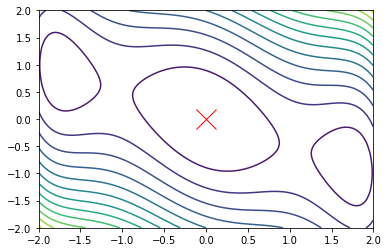

In [ ]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
plot_contour()

As in the first problem, assume that optimization starts from $x = 2, y = 1$. Try minimizing it with SGD, Adam, and Momentum, while only changing the learning rate for each (not the momentum or other hyperparameters). Try to find an optimizer and learning rate that can reach the **global** minimum in as few steps as possible.

In [ ]:
# Function to calculate the function values and Gradient
def f2(x, y):
    return (2*x**2) - (1.05*x**4) + (x**6 / 6) + (x*y) + (y**2)
def df2dx(x,y):
    return (4 * x) - ((1.05 * 4) * x**3) + (x ** 5) + y
def df2dy(x,y):
    return x + 2*y


In [ ]:
# Finding the minimum number of steps for Gradient Descent while trying different learning rates
epsilon=0.01
convergence_dict = {}
learning_rate = np.linspace(0.0001,1,500)
for lr in learning_rate:
    ret = grad_descent(df2dx, df2dy, max_iter=20, init_t=np.array([2.0,1.0]), lr=lr,epsilon=epsilon) #best convergence at 0.08 LR
    function_value = f2(ret[-1,0],ret[-1,1])
    convergence_dict[lr] = function_value

good_convergence = {k: v for k, v in convergence_dict.items() if v < epsilon}
minval = min(good_convergence.values())
res = [(k,v) for k, v in good_convergence.items() if v == minval]
print(f'Three Hump Camel Function - GD 20 steps Good Learning rate:{res[0][0]}, Function Value:{res[0][1]}')

Gradient Descent converges at 1 step for Learning Rate 0.0001
Gradient Descent converges at 7 step for Learning Rate 0.002103807615230461
Gradient Descent converges at 19 step for Learning Rate 0.10429799599198397
Gradient Descent converges at 18 step for Learning Rate 0.10630180360721443
Gradient Descent converges at 16 step for Learning Rate 0.10830561122244489
Gradient Descent converges at 15 step for Learning Rate 0.11030941883767535
Gradient Descent converges at 14 step for Learning Rate 0.11231322645290583
Gradient Descent converges at 13 step for Learning Rate 0.11431703406813629
Gradient Descent converges at 12 step for Learning Rate 0.11632084168336675
Gradient Descent converges at 11 step for Learning Rate 0.1183246492985972
Gradient Descent converges at 11 step for Learning Rate 0.12032845691382767
Gradient Descent converges at 11 step for Learning Rate 0.12233226452905813
Gradient Descent converges at 10 step for Learning Rate 0.12433607214428859
Gradient Descent converges 

<ipython-input-13-f01b2dc833a3>:5: RuntimeWarning: overflow encountered in double_scalars
  return (4 * x) - ((1.05 * 4) * x**3) + (x ** 5) + y
<ipython-input-13-f01b2dc833a3>:5: RuntimeWarning: invalid value encountered in double_scalars
  return (4 * x) - ((1.05 * 4) * x**3) + (x ** 5) + y


In [ ]:
# Finding the minimum number of steps for Momentum while trying to find different learning rates
convergence_dict.clear()
good_convergence.clear()
for lr in learning_rate:
    ret = grad_descent_momentum(df2dx, df2dy,max_iter=20, init_t=np.array([2.0,1.0]), lr=lr, eta=0.9,epsilon=epsilon)
    function_value = f2(ret[-1, 0], ret[-1, 1])
    convergence_dict[lr] = function_value

good_convergence = {k: v for k, v in convergence_dict.items() if v < epsilon}
if len(good_convergence) == 0:
    print(f'Momentum 20 steps did not converge at any learning rate')
else:
    minval = min(good_convergence.values())
    res = [(k,v) for k, v in good_convergence.items() if v == minval]
    print(f'Three Hump Camel Function - Momentum 20 steps Good Learning rate:{res[0][0]}, Function Value:{res[0][1]}')

Momentum converges at 0 step for Learning Rate 0.0001
Three Hump Camel Function - Momentum 20 steps Good Learning rate:0.1584008016032064, Function Value:0.0016925799798198666


<ipython-input-13-f01b2dc833a3>:5: RuntimeWarning: overflow encountered in double_scalars
  return (4 * x) - ((1.05 * 4) * x**3) + (x ** 5) + y
<ipython-input-13-f01b2dc833a3>:5: RuntimeWarning: invalid value encountered in double_scalars
  return (4 * x) - ((1.05 * 4) * x**3) + (x ** 5) + y
<ipython-input-13-f01b2dc833a3>:3: RuntimeWarning: overflow encountered in double_scalars
  return (2*x**2) - (1.05*x**4) + (x**6 / 6) + (x*y) + (y**2)
<ipython-input-13-f01b2dc833a3>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (2*x**2) - (1.05*x**4) + (x**6 / 6) + (x*y) + (y**2)


In [ ]:
# Adam for Question 2
def grad_descent_adam2(f,dfdx,dfdy,max_iter,init_t, beta1, beta2, lr, epsilon):
    t = init_t.copy()
    ret = np.array([init_t.copy()])
    s1 = 0.0
    s2 = 0.0
    v1 = 0.0
    v2 = 0.0
    iter = 1
    while iter < max_iter+1:
        v1 = beta1 * v1 + (1 - beta1) * dfdx(t[0],t[1])
        v2 = beta1 * v2 + (1 - beta1) * dfdy(t[0],t[1])
        s1 = beta2 * s1 + (1 - beta2) * (dfdx(t[0],t[1]) ** 2)
        s2 = beta2 * s2 + (1 - beta2) * (dfdy(t[0],t[1]) ** 2)
        m_hat_v1 = v1 / (1 - beta1 ** iter)
        m_hat_v2 = v2 / (1 - beta1 ** iter)
        s_hat_s1 = s1 / (1 - beta2 ** iter)
        s_hat_s2 = s2 / (1 - beta2 ** iter)
        t[0] = t[0] - lr * (m_hat_v1 / (np.sqrt(s_hat_s1) + 1e-6))
        t[1] = t[1] - lr * (m_hat_v2 / (np.sqrt(s_hat_s2) + 1e-6))
        if f(t[0], t[1])< epsilon:
            print(f"Adam converges at {iter} step for Learning Rate {lr}")
            break
        ret = np.vstack((ret, [t]))
        iter += 1

    return iter


In [ ]:
# Finding the minimum number of steps for Adam while trying to find different learning rates
convergence_dict.clear()
for lr in learning_rate:
  iter = grad_descent_adam2(f2, df2dx, df2dy,max_iter=80, init_t=np.array([2.0,1.0]), beta1=0.9, beta2=0.999, lr=lr, epsilon=0.0001)
  convergence_dict[lr] = iter
miniter = min(list(convergence_dict.values()))
res = [(k,v) for k, v in convergence_dict.items() if v == miniter]
print(f'Three Hump Camel Function - Adam Best Step Size:{res[0][1]}, Corresponding Learning Rate:{res[0][0]}')

Adam converges at 50 step for Learning Rate 0.20248456913827656
Adam converges at 49 step for Learning Rate 0.20649218436873748
Adam converges at 49 step for Learning Rate 0.20849599198396793
Adam converges at 48 step for Learning Rate 0.21250360721442885
Adam converges at 65 step for Learning Rate 0.21651122244488977
Adam converges at 65 step for Learning Rate 0.21851503006012024
Adam converges at 64 step for Learning Rate 0.2205188376753507
Adam converges at 64 step for Learning Rate 0.22252264529058116
Adam converges at 63 step for Learning Rate 0.22452645290581164
Adam converges at 63 step for Learning Rate 0.22653026052104208
Adam converges at 63 step for Learning Rate 0.22853406813627256
Adam converges at 62 step for Learning Rate 0.230537875751503
Adam converges at 62 step for Learning Rate 0.23254168336673348
Adam converges at 62 step for Learning Rate 0.23454549098196392
Adam converges at 61 step for Learning Rate 0.2365492985971944
Adam converges at 61 step for Learning Rate 